In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!cd "/content/gdrive/My Drive/Colab_codes"

In [3]:
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [0]:
from keras.applications.inception_v3 import InceptionV3, decode_predictions
from keras import backend as K

In [5]:
iv3 = InceptionV3()

Instructions for updating:
Colocations handled automatically by placer.
96116736/96112376 [==============================] - 4s 0us/step


In [0]:
from keras.preprocessing import image

In [7]:
x=image.img_to_array(image.load_img("/content/gdrive/My Drive/Colab Notebooks/avion.jpg",target_size=(299,299)))

#cambio de rango 0-255 a 0-1
x/=255
x-=0.5
x*=2

x = x.reshape([1,x.shape[0],x.shape[1],x.shape[2]])
print(x.shape)

y = iv3.predict(x)

decode_predictions(y)


(1, 299, 299, 3)
40960/35363 [==================================] - 0s 2us/step


[[('n02690373', 'airliner', 0.9280448),
  ('n04592741', 'wing', 0.019904787),
  ('n02483362', 'gibbon', 0.0010694037),
  ('n02423022', 'gazelle', 0.00067635975),
  ('n04266014', 'space_shuttle', 0.00055088673)]]

In [9]:
inp_layer = iv3.layers[0].input
out_layer = iv3.layers[-1].output

target_class = 625

loss = out_layer[0,target_class] ##función de coste

grad = K.gradients(loss,inp_layer)[0] ##tensor de optimización 

optimize_gradient = K.function([inp_layer,K.learning_phase()],[grad,loss])

adv = np.copy(x)

pert=0.1

max_pert = x + 0.01
min_pert = x - 0.01



cost = 0.0

while cost < 0.95:
  
  gr, cost = optimize_gradient([adv,0])
  
  adv += gr
  
  #adv = np.clip(adv,min_pert,min_pert)
  adv = np.clip(adv,-1,1)
  
  print("Target cost:",cost)

haked = np.copy(adv)

Target cost: 7.181215e-05
Target cost: 7.2113646e-05
Target cost: 7.2419934e-05
Target cost: 7.2728595e-05
Target cost: 7.3039235e-05
Target cost: 7.3350406e-05
Target cost: 7.365454e-05
Target cost: 7.395243e-05
Target cost: 7.4238655e-05
Target cost: 7.452537e-05
Target cost: 7.4815835e-05
Target cost: 7.5102944e-05
Target cost: 7.5390264e-05
Target cost: 7.567981e-05
Target cost: 7.5971046e-05
Target cost: 7.626007e-05
Target cost: 7.654848e-05
Target cost: 7.683121e-05
Target cost: 7.710825e-05
Target cost: 7.738614e-05
Target cost: 7.766281e-05
Target cost: 7.794019e-05
Target cost: 7.82224e-05
Target cost: 7.850744e-05
Target cost: 7.879288e-05
Target cost: 7.907825e-05
Target cost: 7.93639e-05
Target cost: 7.964683e-05
Target cost: 7.9927064e-05
Target cost: 8.021043e-05
Target cost: 8.049189e-05
Target cost: 8.0775084e-05
Target cost: 8.1055776e-05
Target cost: 8.134214e-05
Target cost: 8.162404e-05
Target cost: 8.190595e-05
Target cost: 8.2188344e-05
Target cost: 8.247524e-05


In [0]:
adv/=2
adv+=0.5  #Corrección de parametros RGB
adv*=255

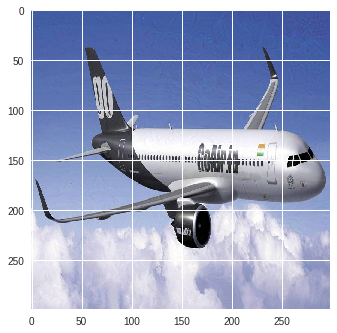

In [11]:
plt.imshow(adv[0].astype(np.uint8))
plt.show()

In [12]:
y = iv3.predict(adv)

decode_predictions(y)

[[('n03950228', 'pitcher', 0.98157823),
  ('n01924916', 'flatworm', 0.018421713),
  ('n04131690', 'saltshaker', 7.1782594e-08),
  ('n03047690', 'clog', 9.975484e-18),
  ('n02841315', 'binoculars', 1.2836422e-23)]]